# Examen Corto 1

Integrantes:
- Francis Aguilar #22223
- Gerardo Pineda #22808
- Angela Garcia #22869

## Objetivo:
## Implementar un agente inteligente que resuelva el juego de frozen lake con el argumento de slippery=True, usando un algoritmo de aprendizaje por refuerzo.


In [15]:
#librerias
import gymnasium as gym #con esta liberia se tiene espacio de acciones, espacio observable, estado inicial conjunto de acciones, finales de episodio.
import numpy as np
import random
import time
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import matplotlib.pyplot as plt

seteo de semilla random

In [16]:
# Configuración reproducible
seed = int(time.time()) 
# Descomentar si no se quiere que sea aleatorio
# seed = 42 
random.seed(seed)
np.random.seed(seed)
print("seed:", seed)



seed: 1741629878


In [24]:
#crear el entorno de frozen lake
random_map = generate_random_map(size=4)

env = gym.make("FrozenLake-v1",  map_name="4x4", is_slippery=True) # map_name="4x4",

print('mapa: ')
for row in random_map:
    print(" ".join(row))



mapa: 
S F F F
F H F F
F F F F
H F F G


Algoritmo de Q-learning:
Este algoritmo es un método de aprendizaje por refuerzo que permite a un agente aprender a tomar decisiones óptimas en un entorno. 
Se usó este algoritmo porque este esta basado en los principio de MDP, procesos de decision de Markov, para aprender una politica óptima.


El proceso de decisión de Markov (MDP), ayuda a modelar la toma de descisiones en situaciones donde los resultados son aleatorios y tiene bajo el control de decisor.Usualmente se usa en el area de IA, aprendizaje por refuerzo y la teoría de control.

Componentes: 
- Estados (S): 
    Conjunto de todos los posibles estados en los que puede estar el agente.

- Acciones (A):
    las decisiones/ movimientos que un agente puede tomar

- Probabilidades de transicion  (P):  
    Describe la probabilidad de moverse de un estado a otra, dado una accion.

- Recompensas (R):
    Indican la recompensa inmediata luego de tomar una accion en un estado

- Horizonte de tiempo: 
    Si es finito o infinito, define el periodo durante en el que se toman desiciones

- Descuento:
    factor de descuento entre 0 y 1 que reduce el valor de las recompensas futuras, lo que refleja es la preferencia por obtener las recomensas más temprano.


Relación con Q-learning: 
Q-learning es un algoritmo de aprendizaje por refuerzo que se usa para encontrar la politica óptima (que es la que maximiza la recompenza acumulada a largo plazo) en un MDP. 

- Estados y Acciones: En Q-learning, el agente explora diferentes estados y acciones, que son componentes fundamentales de un MDP.

- Transiciones: Q-learning no necesita conocer las probabilidades de transición tan a detalle, aprende por medio de la interaccion con el entorno, que sigue las 
propiedades de las cadenas de Markov.

- Recompensas: El agente recibe recompensas basadas en las acciones tomadas y los estados alcanzados, y estas recompensas se utilizan para actualizar la tabla Q.

- Factor de descuento: El factor de descuento (y) en Q-learning es el mismo concepto que en un MDP, que valora las recompensas futuras.


Por lo tanto, se escogió este algoritmo por su parecido a MDP, por su entorno es estocástico, con el slippery = true. Su fácil implementacion, ser eficiente para problemas con estados y acciones, la convergencia de una política óptima, entonces el agente aprenderá de la mejor manera de actuar en el entorno. Al tener la estrategia de exploracion vs explotación, permite al agente balancear entre probar nuevas acciones y usar el conocimiento adquirido para maximizar la recompensa.


In [18]:
# Variables para el aprendizaje por refuerzo
Q = np.zeros([env.observation_space.n, env.action_space.n])  # Q-table
alpha = 0.05  # Tasa de aprendizaje más baja para aprendizaje gradual
gamma = 0.99  # Factor de descuento

# Para una exploración más prolongada
epsilon = 1.0  # Más exploración al inicio
epsilon_decay = 0.999  # Disminución más lenta para permitir exploración más tiempo
epsilon_min = 0.01  # Límite mínimo de exploración

num_episodes = 5000  # Número de episodios de entrenamiento

rewards_per_episode = [] # Para el conteo de estadísticas
success_count = 0 # Conteo de éxitos

# Algoritmo de Q-learning
for episode in range(num_episodes):
    state = env.reset()[0]  
    done = False
    total_reward = 0

    while not done:
        # Exploración-explotación
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() 
        else:
            action = np.argmax(Q[state, :])  # Mejor acción según la Q-table

        # Ejecutar la acción en el entorno
        new_state, reward, done, _, _ = env.step(action)

        # Actualizar Q-Table
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])

        state = new_state
        total_reward += reward

        if done:
            print(f"Episodio: {episode}, Recompensa total: {total_reward}, ¿Éxito?: {reward == 1}")

            if reward == 1:
                print("¡Éxito alcanzado!")
                success_count += 1
            break

    rewards_per_episode.append(total_reward)
    epsilon = max(epsilon * epsilon_decay, epsilon_min)  # Reducir epsilon gradualmente


Episodio: 0, Recompensa total: 0.0, ¿Éxito?: False
Episodio: 1, Recompensa total: 0.0, ¿Éxito?: False
Episodio: 2, Recompensa total: 0.0, ¿Éxito?: False
Episodio: 3, Recompensa total: 0.0, ¿Éxito?: False
Episodio: 4, Recompensa total: 0.0, ¿Éxito?: False
Episodio: 5, Recompensa total: 0.0, ¿Éxito?: False
Episodio: 6, Recompensa total: 0.0, ¿Éxito?: False
Episodio: 7, Recompensa total: 0.0, ¿Éxito?: False
Episodio: 8, Recompensa total: 0.0, ¿Éxito?: False
Episodio: 9, Recompensa total: 0.0, ¿Éxito?: False
Episodio: 10, Recompensa total: 0.0, ¿Éxito?: False
Episodio: 11, Recompensa total: 0.0, ¿Éxito?: False
Episodio: 12, Recompensa total: 0.0, ¿Éxito?: False
Episodio: 13, Recompensa total: 0.0, ¿Éxito?: False
Episodio: 14, Recompensa total: 0.0, ¿Éxito?: False
Episodio: 15, Recompensa total: 0.0, ¿Éxito?: False
Episodio: 16, Recompensa total: 0.0, ¿Éxito?: False
Episodio: 17, Recompensa total: 0.0, ¿Éxito?: False
Episodio: 18, Recompensa total: 0.0, ¿Éxito?: False
Episodio: 19, Recompen

# Evaluar el agente

In [19]:
# Mostrar estadísticas del entrenamiento
print(f"Éxitos en {num_episodes} episodios: {success_count}/{num_episodes}")
print(f"Recompensas promedio por episodio: {np.mean(rewards_per_episode):.4f}")

Éxitos en 5000 episodios: 1955/5000
Recompensas promedio por episodio: 0.3910


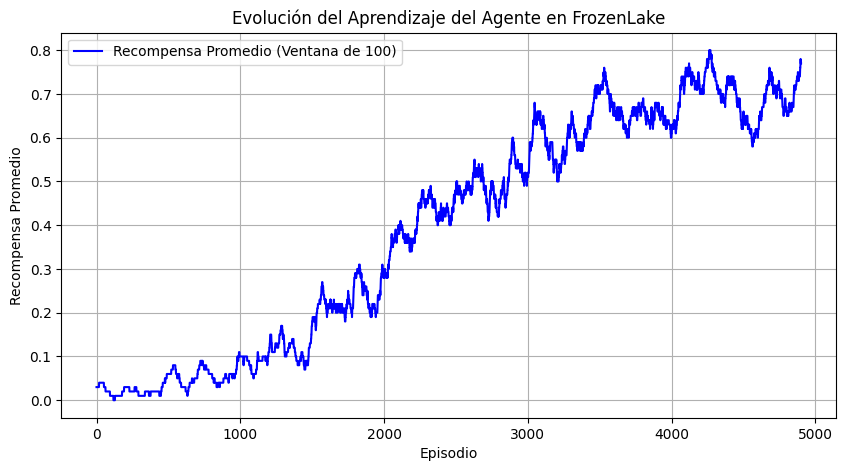

In [20]:
rewards = np.array(rewards_per_episode)

window_size = 100
rolling_avg = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(10, 5))
plt.plot(rolling_avg, label="Recompensa Promedio (Ventana de 100)", color="blue")
plt.xlabel("Episodio")
plt.ylabel("Recompensa Promedio")
plt.title("Evolución del Aprendizaje del Agente en FrozenLake")
plt.legend()
plt.grid(True)
plt.show()

Luego de evaluar el modelo se prueba el modelo sin aprender para ver que tan bien aprendio. Se hace el mismo procedimiento pero sin exploracion solo para ver que tan bien sigue la estrategia.

In [21]:
num_test_episodes = 5000  # Número de episodios de prueba
success_count = 0
steps_per_episode = []

for episode in range(num_test_episodes):
    state = env.reset()[0]
    done = False
    steps = 0

    while not done:
        action = np.argmax(Q[state, :]) 
        new_state, reward, done, _, _ = env.step(action)
        state = new_state
        steps += 1

        if done:
            if reward > 0: 
                success_count += 1
            break

    steps_per_episode.append(steps)

# Resultados de la prueba
print(f"Éxito en {success_count}/{num_test_episodes} episodios ({(success_count/num_test_episodes) * 100:.2f}%)")
print(f"Promedio de pasos para llegar al objetivo: {np.mean(steps_per_episode):.2f}")


Éxito en 3930/5000 episodios (78.60%)
Promedio de pasos para llegar al objetivo: 44.14


### Interpretación de resultados

El aprendizaje fue exitoso ya que el agente fue capaz de realizar el aprendizaje de manera efectiva. Al principio, cuando el modelo estaba aprendiendo tuvo un 39.1% de éxito, lo que indica que el modelo todavía tiene margen de mejora. En la gráfica se puede observar la mejora progresiva del avance mientras los eposodios van aumentando. Se puede observar que el aprendizaje no es lineal, pero hay una mejora clara con el tiempo. A medida que se afina la política aprendida, el agente logra mejores resultados de forma más consistente. Existe fluctuaciones, pero asumiremos que es debido al *slippery=true*. El modelo aprende gradualmente a evitar los agujeros y a llegar al objetivo, aunque la incertidumbre por el deslizamiento en el entorno lo hace fallar en más de la mitad de los intentos. 

Luego que se realizó la política aprendida sin exploración, el agente tuvo 78.6% de éxito. Esto demuestra que aprendió una estrategia efectiva y que la incertidumbre en el entrenamiento estaba más relacionada con la exploración. Adicionalmente, indica que le toma 44.14 pasos para llegar al objetivo, esto se podría optimizar, pero no es un resultado negativo. El agente logró aprender una estrategia efectiva para completar el juego en la mayoría de los casos, lo que valida que Q-learning es un buen método para este entorno